Project: car price prediction

Name : Shravani Deshpande



In [ ]:
import warnings
warnings.filterwarnings('ignore')
#reading the dataset
import pandas as pd
cars_df=pd.read_csv("/Cars.csv")
cars_df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Colour,Seats,No. of Doors,New_Price,Price
0,Mahindra Scorpio,Pune,2012.0,99000.0,Diesel,Manual,Third,12.05 kmpl,2179 CC,120 bhp,Black/Silver,8.0,5.0,NaN,6.00
1,Maruti Baleno,Kochi,2018.0,18678.0,Petrol,Manual,First,21.1 kmpl,998 CC,100 bhp,Others,5.0,4.0,NaN,8.32
2,Mahindra Xylo,Bangalore,2013.0,197000.0,Diesel,Manual,First,11.68 kmpl,2498 CC,112 bhp,White,7.0,5.0,NaN,4.00
3,Hyundai Grand,Delhi,2014.0,45000.0,Diesel,Manual,First,24.0 kmpl,1120 CC,70 bhp,White,5.0,4.0,NaN,3.49
4,Toyota Innova,Delhi,2011.0,65000.0,Diesel,Manual,First,12.8 kmpl,2494 CC,102 bhp,Others,8.0,5.0,NaN,6.40


In [ ]:
#getting informartion about the dataset
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5961 non-null   object 
 1   Location           5950 non-null   object 
 2   Year               5959 non-null   float64
 3   Kilometers_Driven  5953 non-null   float64
 4   Fuel_Type          5961 non-null   object 
 5   Transmission       5934 non-null   object 
 6   Owner_Type         5946 non-null   object 
 7   Mileage            5959 non-null   object 
 8   Engine             5944 non-null   object 
 9   Power              5929 non-null   object 
 10  Colour             5950 non-null   object 
 11  Seats              5956 non-null   float64
 12  No. of Doors       5960 non-null   float64
 13  New_Price          824 non-null    object 
 14  Price              5961 non-null   float64
dtypes: float64(5), object(10)
memory usage: 698.7+ KB


In [ ]:
#describing the dataset
cars_df.describe()

,Year,Kilometers_Driven,Seats,No. of Doors,Price
count,5959.000000,5.953000e+03,5956.000000,5960.000000,5961.000000
mean,2013.389159,5.871110e+04,5.269140,4.114933,9.528103
std,3.243051,9.171221e+04,0.789048,0.344757,11.214382
min,1998.000000,1.710000e+02,2.000000,2.000000,0.440000
25%,2011.500000,3.393100e+04,5.000000,4.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,4.000000,5.660000
75%,2016.000000,7.300000e+04,5.000000,4.000000,10.000000
max,2019.000000,6.500000e+06,10.000000,5.000000,160.000000


In [ ]:
#printing no. of rows and columns
print("Number of rows",cars_df.shape[0])
print("Number of columns",cars_df.shape[1])

Number of rows 5961
Number of columns 15


In [ ]:
#chexcking for any missing values
cars_df.isnull().sum()

Name                    0
Location               11
Year                    2
Kilometers_Driven       8
Fuel_Type               0
Transmission           27
Owner_Type             15
Mileage                 2
Engine                 17
Power                  32
Colour                 11
Seats                   5
No. of Doors            1
New_Price            5137
Price                   0
dtype: int64

In [ ]:
#creating column age for storing the the number of years car was used
import datetime
date_time = datetime.datetime.now()
cars_df['Age']=date_time.year-cars_df['Year']
cars_df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Colour,Seats,No. of Doors,New_Price,Price,Age
0,Mahindra Scorpio,Pune,2012.0,99000.0,Diesel,Manual,Third,12.05 kmpl,2179 CC,120 bhp,Black/Silver,8.0,5.0,NaN,6.00,11.0
1,Maruti Baleno,Kochi,2018.0,18678.0,Petrol,Manual,First,21.1 kmpl,998 CC,100 bhp,Others,5.0,4.0,NaN,8.32,5.0
2,Mahindra Xylo,Bangalore,2013.0,197000.0,Diesel,Manual,First,11.68 kmpl,2498 CC,112 bhp,White,7.0,5.0,NaN,4.00,10.0
3,Hyundai Grand,Delhi,2014.0,45000.0,Diesel,Manual,First,24.0 kmpl,1120 CC,70 bhp,White,5.0,4.0,NaN,3.49,9.0
4,Toyota Innova,Delhi,2011.0,65000.0,Diesel,Manual,First,12.8 kmpl,2494 CC,102 bhp,Others,8.0,5.0,NaN,6.40,12.0


In [ ]:
cars_df.drop('Year',axis=1,inplace=True)
cars_df.head()

,Name,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Colour,Seats,No. of Doors,New_Price,Price,Age
0,Mahindra Scorpio,Pune,99000.0,Diesel,Manual,Third,12.05 kmpl,2179 CC,120 bhp,Black/Silver,8.0,5.0,NaN,6.00,11.0
1,Maruti Baleno,Kochi,18678.0,Petrol,Manual,First,21.1 kmpl,998 CC,100 bhp,Others,5.0,4.0,NaN,8.32,5.0
2,Mahindra Xylo,Bangalore,197000.0,Diesel,Manual,First,11.68 kmpl,2498 CC,112 bhp,White,7.0,5.0,NaN,4.00,10.0
3,Hyundai Grand,Delhi,45000.0,Diesel,Manual,First,24.0 kmpl,1120 CC,70 bhp,White,5.0,4.0,NaN,3.49,9.0
4,Toyota Innova,Delhi,65000.0,Diesel,Manual,First,12.8 kmpl,2494 CC,102 bhp,Others,8.0,5.0,NaN,6.40,12.0


In [ ]:
#treating the missing values
cars_df.dropna(inplace=True)
cars_df.head()

,Name,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Colour,Seats,No. of Doors,New_Price,Price,Age
5,Honda WRV,Kochi,15135.0,Petrol,Manual,First,17.5 kmpl,1199 CC,88.7 bhp,White,5.0,4.0,10.57 Lakh,9.29,5.0
22,BMW 3,Mumbai,48000.0,Diesel,Automatic,First,21.76 kmpl,1995 CC,190 bhp,Others,5.0,4.0,60.88 Lakh,26.50,9.0
27,Maruti Vitara,Coimbatore,64456.0,Diesel,Manual,First,24.3 kmpl,1248 CC,88.5 bhp,White,5.0,4.0,11 Lakh,10.46,5.0
32,Maruti Wagon,Kochi,15466.0,Petrol,Manual,First,22.5 kmpl,998 CC,67.04 bhp,White,5.0,4.0,5.04 Lakh,3.36,12.0
36,Mercedes-Benz C-Class,Mumbai,8682.0,Diesel,Automatic,First,0.0 kmpl,1950 CC,194 bhp,White,5.0,4.0,52.26 Lakh,39.50,5.0


Treating the categorical columns and converting them into numeric

In [ ]:
cars_df['Fuel_Type'].unique()
cars_df['Fuel_Type']=cars_df['Fuel_Type'].map({'Petrol':0,'Diesel':1,'CNG':2})

In [ ]:
print(cars_df['Transmission'].unique())

['Manual' 'Automatic']


In [ ]:
cars_df['Transmission']=cars_df['Transmission'].map({'Manual':0,'Automatic':1})

In [ ]:
cars_df['Owner_Type'].unique()

array(['First', 'Second', 'Third'], dtype=object)

In [ ]:
cars_df['Owner_Type']=cars_df['Owner_Type'].map({'First':1,'Second':2,'Third':3,'Fourth & Above':4})

In [ ]:
cars_df['Mileage'] = cars_df['Mileage'].str.replace('kmpl','')


In [ ]:
cars_df['Mileage'] = cars_df['Mileage'].str.replace('km/kg','')

In [ ]:
cars_df['Engine'] = cars_df['Engine'].str.replace('CC','')

In [ ]:
cars_df['Power'] = cars_df['Power'].str.replace('bhp','')

In [ ]:
cars_df['New_Price'] = cars_df['New_Price'].str.replace('Lakh','')
cars_df['New_Price'] = cars_df['New_Price'].str.replace('Cr','')

In [ ]:
cars_df['Colour'].unique()

array(['White', 'Others', 'Black/Silver'], dtype=object)

In [ ]:
cars_df['Colour']=cars_df['Colour'].map({'White':1,'Black/Silver':2,'Others':3})

<Axes: >

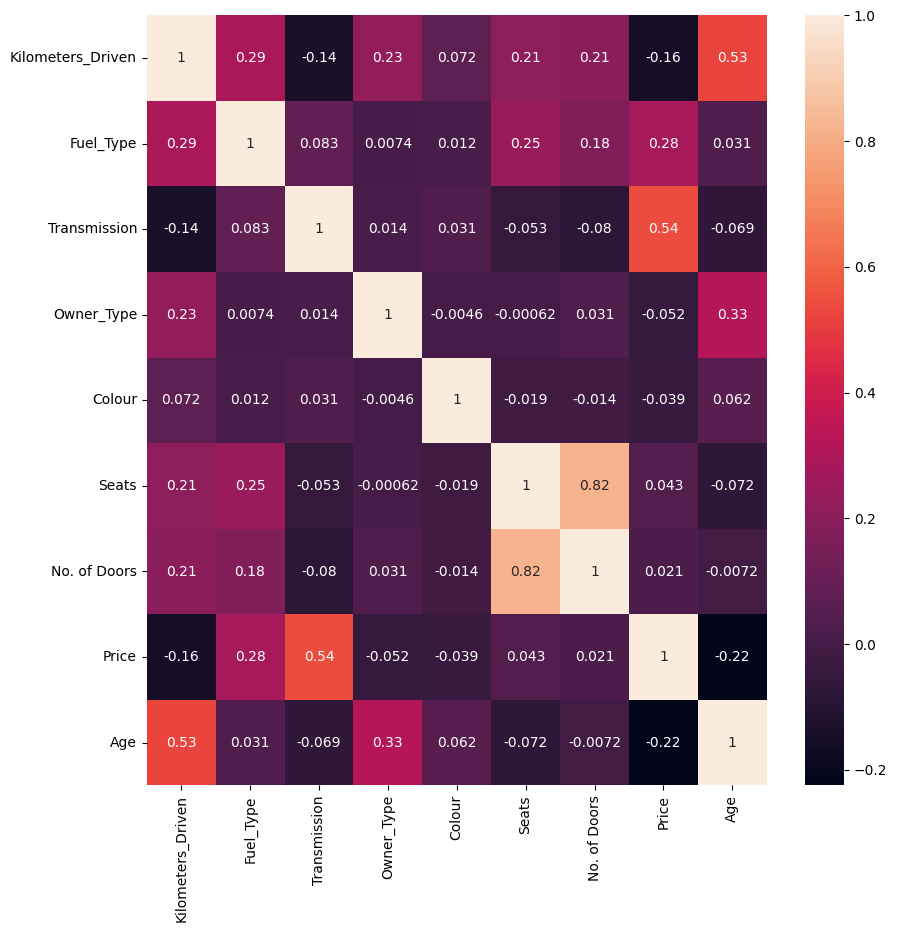

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
#get correlations of each features in dataset
corrmat = cars_df.corr(method='pearson')
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map of the corerlation of the features
sns.heatmap(cars_df[top_corr_features].corr(method='pearson'),annot=True)
#annot = true will write the data in each cell.

In [ ]:
X= cars_df.drop(['Price','Name','Location'],axis=1)
#slicing the dataset and reomoving the selling price for training the model
Y = cars_df['Price']
#storing the selling price for checking..as this is the value to be predicted
print(X.head())
print(Y.head())

    Kilometers_Driven  Fuel_Type  Transmission  Owner_Type Mileage Engine  \
5             15135.0          0             0           1   17.5   1199    
22            48000.0          1             1           1  21.76   1995    
27            64456.0          1             0           1   24.3   1248    
32            15466.0          0             0           1   22.5    998    
36             8682.0          1             1           1    0.0   1950    

     Power  Colour  Seats  No. of Doors New_Price   Age  
5    88.7        1    5.0           4.0    10.57    5.0  
22    190        3    5.0           4.0    60.88    9.0  
27   88.5        1    5.0           4.0       11    5.0  
32  67.04        1    5.0           4.0     5.04   12.0  
36    194        1    5.0           4.0    52.26    5.0  
5      9.29
22    26.50
27    10.46
32     3.36
36    39.50
Name: Price, dtype: float64


In [ ]:
#importing all the necessary models for building the predictor and splitting the datset into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.33,random_state=42)
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [ ]:
#creating three models to choose the best one. Namely, Linear regression, randomforest regressor and Gradient Boosting Regressor.
lr = LinearRegression()
lr.fit(X_train,y_train)

rf = RandomForestRegressor()
rf.fit(X_train,y_train)

xgb = GradientBoostingRegressor()
xgb.fit(X_train,y_train)



GradientBoostingRegressor()

In [ ]:
#predicting based on the models created above
y_pred1 = lr.predict(X_test)
y_pred2 = rf.predict(X_test)
y_pred3 = xgb.predict(X_test)


In [ ]:
#Getting the score inorder to check the accuracy of models and choose the best one
from sklearn import metrics
score_1 = metrics.r2_score(y_test,y_pred1)
score_2 = metrics.r2_score(y_test,y_pred2)
score_3 = metrics.r2_score(y_test,y_pred3)


In [ ]:
print(score_1,score_2,score_3)

0.7998589240890882 0.9674664849196974 0.9472690766906722


In [ ]:
#creating the dataframe to store the scores of all models
final_data = pd.DataFrame({'Models':['LR','RF','GBR'],"R2_SCORE":[score_1,score_2,score_3]})
final_data

,Models,R2_SCORE
0,LR,0.799859
1,RF,0.967466
2,GBR,0.947269


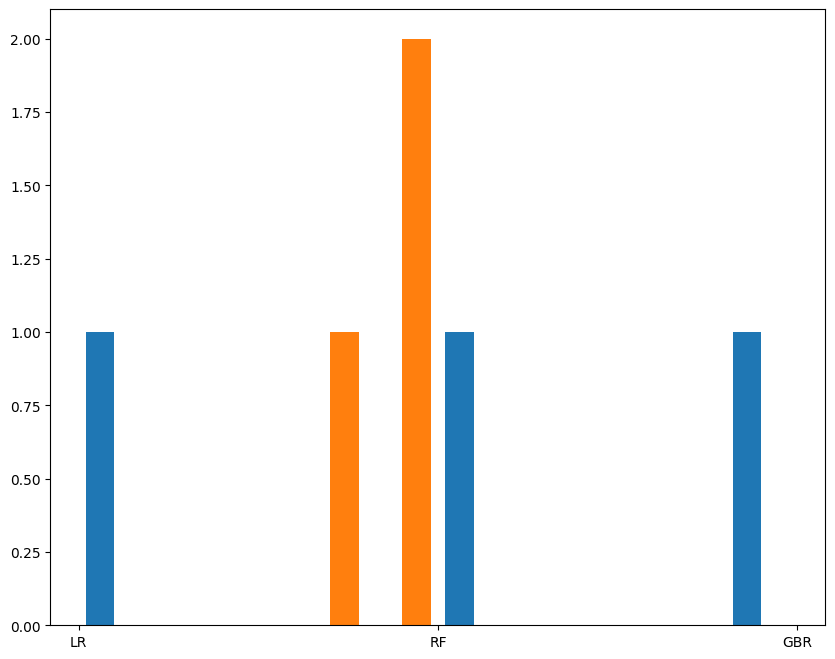

In [ ]:
#visualizing the scores
plt.figure(figsize=(10,8))
plt.hist(final_data)
plt.show()

In [ ]:
#The rf model has the best accuracy hence choosing it as final model
rf = RandomForestRegressor()
rf_final=rf.fit(X,Y)

In [ ]:
import joblib
joblib.dump(rf_final,'car_price_predictor')

['car_price_predictor']

In [ ]:
model = joblib.load('car_price_predictor')

In [ ]:
cars_df.head()

,Name,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Colour,Seats,No. of Doors,New_Price,Price,Age
5,Honda WRV,Kochi,15135.0,0,0,1,17.5,1199,88.7,1,5.0,4.0,10.57,9.29,5.0
22,BMW 3,Mumbai,48000.0,1,1,1,21.76,1995,190,3,5.0,4.0,60.88,26.50,9.0
27,Maruti Vitara,Coimbatore,64456.0,1,0,1,24.3,1248,88.5,1,5.0,4.0,11,10.46,5.0
32,Maruti Wagon,Kochi,15466.0,0,0,1,22.5,998,67.04,1,5.0,4.0,5.04,3.36,12.0
36,Mercedes-Benz C-Class,Mumbai,8682.0,1,1,1,0.0,1950,194,1,5.0,4.0,52.26,39.50,5.0


In [ ]:
# predicting on new dataset
import pandas as pd
data_new = pd.DataFrame({
    'Kilometers_Driven':27000,
    'Fuel_Type':0,
    'Transmission':0,
    'Owner_Type':0,
    'Mileage':17.3,
    'Engine':1199,
    'Power':188,
    'Colour':2,
    'Seats':5.0,
    'No. of Doors':4.0,
    'New_Price':11,
    'Age':8
},index=[0])

In [ ]:
model.predict(data_new)

array([11.774])